# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jurin\AppData\Local\Temp\ipykernel_3740\1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\jurin\AppData\Local\Temp\ipykernel_3740\1842324635.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


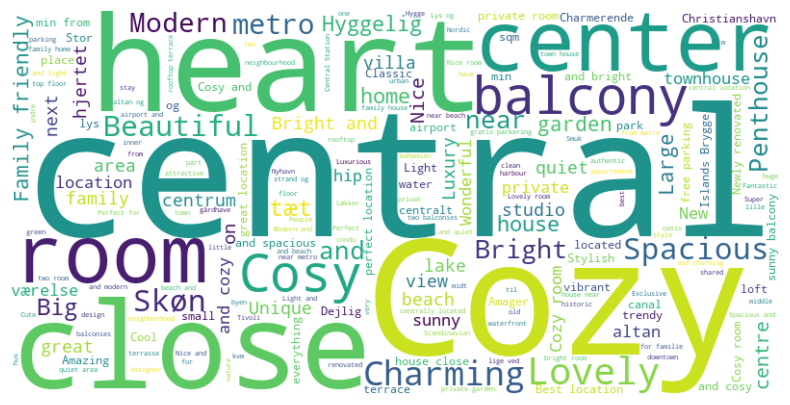

In [1]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

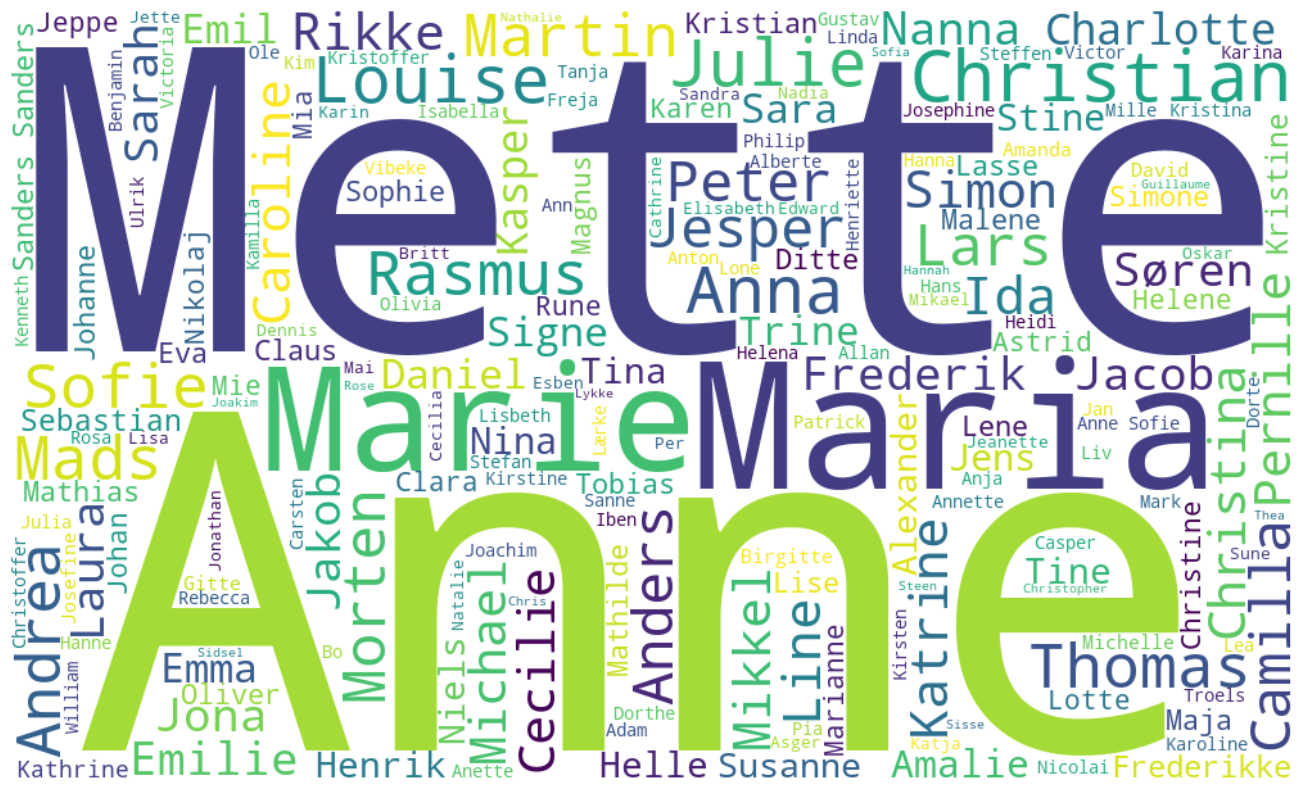

In [7]:
import re
# Define a regular expression pattern to filter out non-person names
host_name = data_filtered['host_name']
host_name = host_name.dropna()

# Filter out non-person names
# host_name = host_name[host_name.str.match(pattern, flags=re.IGNORECASE)].dropna()
# Join all the names into a single string
all_names_text = ' '.join(host_name)
stop_words = ["Place", "LLC", "Inc", "Corporation","Co.", "Company", "Apartments","Rentals", "og", "&", "Denmark", "Copenhagen", "København", "Rent","A", 
              "ApartmentInCopenhagen","ApartmentinCopenhagen","Forenom", "A","Place", "Blueground", "And", "Into" ,"This"]

# Create and generate a word cloud image
wordcloud = WordCloud(width=1000, height=600, stopwords=stop_words, background_color='white').generate(all_names_text)

# Display the generated word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Result: 
We decided to use the data_filtered variable that represents all the listings that contain a review.
According to Danmarks Statisitcs the most popular names are Anne and Peter. The name Anne seems to be the most represented alongside with Mette, which is the second most popular female name in the Danmarks Statisitcs rating. However the same can't be said about Peter. The most popular male name in the retrieved dataset is Christian.

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [3]:
# State your solution here. Add more cells if needed.
import plotly.express as px

lon = data_filtered['longitude'].dropna()
lat = data_filtered['latitude'].dropna()

fig = px.scatter_mapbox(data_filtered,
                        lat="latitude",
                        lon="longitude",
                        zoom=11,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

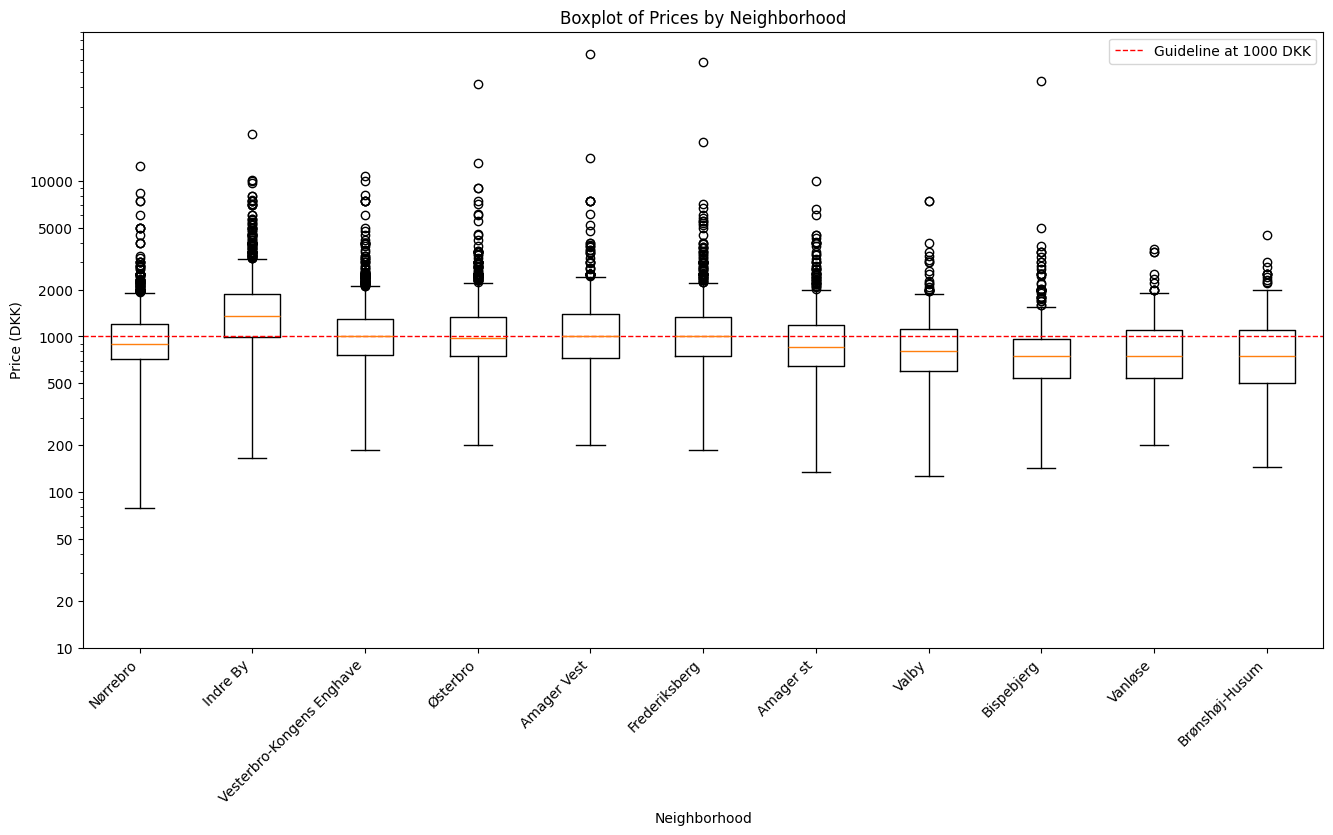

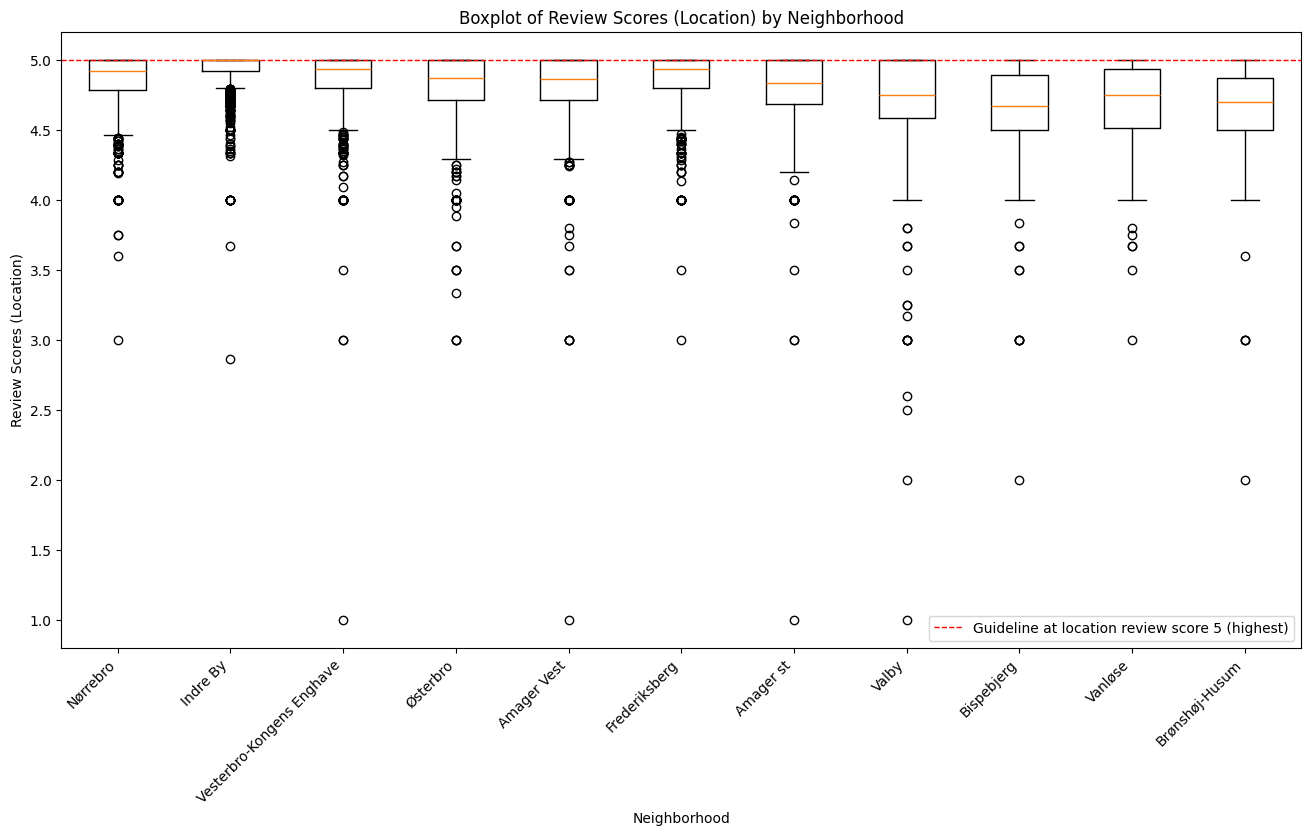

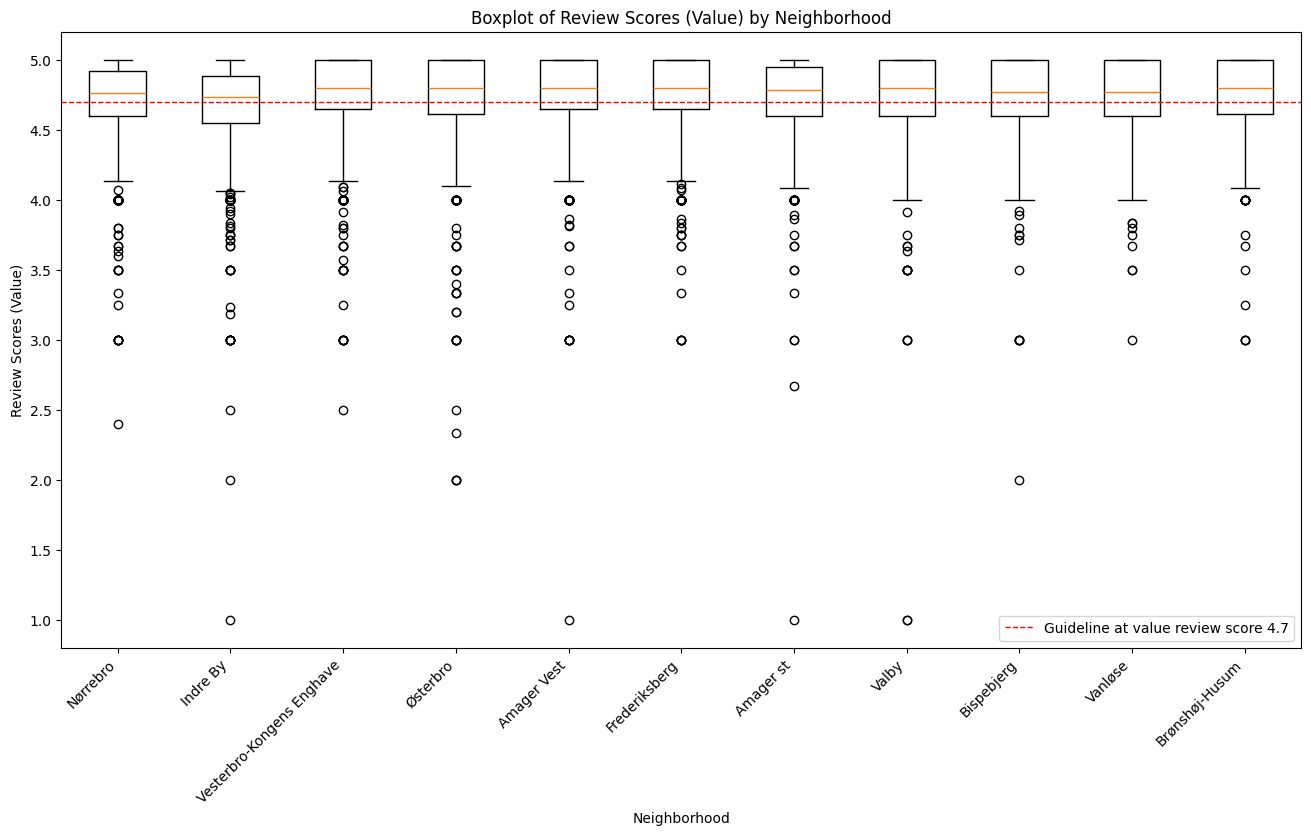

In [32]:
# State your solution here. Add more cells if needed.
import matplotlib.pyplot as plt

# Boxplot of prices by neighborhood

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]['price'] for neighborhood in data_filtered['neighbourhood_cleansed'].unique()],
            labels=data_filtered['neighbourhood_cleansed'].unique())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yscale('log', base=10)

# Add more guide values on the y-axis
guide_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
plt.yticks(guide_values, [str(value) for value in guide_values])

# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Price (DKK)')
plt.title('Boxplot of Prices by Neighborhood')

# Add a guideline at a specific y-axis value 
plt.axhline(y=1000, color='red', linestyle='--', linewidth=1, label='Guideline at 1000 DKK')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Boxplot of review scores location by neighborhood

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]['review_scores_location'] for neighborhood in data_filtered['neighbourhood_cleansed'].unique()],
            labels=data_filtered['neighbourhood_cleansed'].unique())


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Review Scores (Location)')
plt.title('Boxplot of Review Scores (Location) by Neighborhood')

# Add a guideline at a specific y-axis value 
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='Guideline at location review score 5 (highest)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Create a boxplot for review_scores_value
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]['review_scores_value'] for neighborhood in data_filtered['neighbourhood_cleansed'].unique()],
            labels=data_filtered['neighbourhood_cleansed'].unique())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Review Scores (Value)')
plt.title('Boxplot of Review Scores (Value) by Neighborhood')

# Add a guideline at a specific y-axis value 
plt.axhline(y=4.7, color='red', linestyle='--', linewidth=1, label='Guideline at value review score 4.7')

# Show the legend
plt.legend()

# Show the plot
plt.show()





Result:
There seem to be no no low-end outliers, only high-end outliers, so we can deduce that airbnbs in Copenahgen are quite expensive.
According to the medians it is safe to assume that the most expensive neighbourhood is Indre By and the least expensive is either Bispebjerg or Bronshoj-Husum.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [5]:
 # Group data by neighbourhood and room type
from statistics import mode, median
import pandas as pd

neighbourhood_room_analysis = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])
 
price_stats = neighbourhood_room_analysis['review_scores_rating'].describe()
 
room_type_stats = neighbourhood_room_analysis['room_type'].agg(lambda x: x.mode()[0])  # Mode for room type
 
minimum_night_stats = neighbourhood_room_analysis['minimum_nights'].describe()
 
display(price_stats)
display(minimum_night_stats)

df = pd.DataFrame(price_stats)
mode_values = df.mode().iloc[0]  # Mode
median_values = df.median().to_frame()      # Median
display(median_values)
# summary_stats = df.describe().join(pd.Series(mode_values, name='mode')).join(pd.Series(median_values, name='median'))

# summary_stats = pd.concat([df.describe(), pd.DataFrame(mode_values).transpose(), pd.DataFrame(median_values).transpose()])
# display(summary_stats)


count      mean       std   min  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  4.818295  0.308978  1.00   
                          Private room      148.0  4.813108  0.262551  3.50   
                          Shared room         2.0  3.500000  0.707107  3.00   
Amager st                 Entire home/apt   791.0  4.809393  0.273629  1.00   
                          Hotel room          3.0  4.843333  0.146401  4.71   
                          Private room      129.0  4.734806  0.299466  3.00   
                          Shared room         1.0  4.000000       NaN  4.00   
Bispebjerg                Entire home/apt   508.0  4.803720  0.273271  3.00   
                          Private room       95.0  4.759789  0.322955  3.00   
                          Shared room         1.0  4.570000       NaN  4.57   
Brønshøj-Husum            Entire home/apt   216.0  4.779769  0.297106  3.00   
                          Private room       67.0  4.772687  0.282723  3.75   
                          Shared room         2.0  4.735000  0.091924  4.67   
Frederiksberg             Entire home/apt  1044.0  4.835469  0.286300  0.00   
                          Private room      133.0  4.779699  0.251631  4.00   
Indre By                  Entire home/apt  1702.0  4.779935  0.279761  2.00   
                          Hotel room         10.0  4.420000  0.397855  3.50   
                          Private room      128.0  4.700156  0.381456  3.00   
                          Shared room         4.0  4.530000  0.270924  4.28   
Nørrebro                  Entire home/apt  1889.0  4.806829  0.265048  2.50   
                          Private room      165.0  4.799212  0.233225  3.50   
                          Shared room         3.0  4.763333  0.183394  4.62   
Valby                     Entire home/apt   450.0  4.767467  0.367633  1.00   
                          Private room       89.0  4.764607  0.326879  2.75   
Vanløse                   Entire home/apt   254.0  4.776732  0.301430  3.00   
                          Private room       44.0  4.757955  0.196949  4.17   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  4.832601  0.247694  3.00   
                          Private room      221.0  4.791493  0.251403  3.00   
                          Shared room         2.0  4.925000  0.106066  4.85   
Østerbro                  Entire home/apt  1174.0  4.814114  0.297598  2.00   
                          Private room      130.0  4.793154  0.256388  4.00   
                          Shared room         1.0  5.000000       NaN  5.00   

                                              25%    50%     75%   max  
neighbourhood_cleansed    room_type                                     
Amager Vest               Entire home/apt  4.7500  4.900  5.0000  5.00  
                          Private room     4.7575  4.880  5.0000  5.00  
                          Shared room      3.2500  3.500  3.7500  4.00  
Amager st                 Entire home/apt  4.7150  4.880  5.0000  5.00  
                          Hotel room       4.7650  4.820  4.9100  5.00  
                          Private room     4.6300  4.820  4.9400  5.00  
                          Shared room      4.0000  4.000  4.0000  4.00  
Bispebjerg                Entire home/apt  4.7000  4.890  5.0000  5.00  
                          Private room     4.6600  4.880  5.0000  5.00  
                          Shared room      4.5700  4.570  4.5700  4.57  
Brønshøj-Husum            Entire home/apt  4.6700  4.875  5.0000  5.00  
                          Private room     4.6750  4.860  5.0000  5.00  
                          Shared room      4.7025  4.735  4.7675  4.80  
Frederiksberg             Entire home/apt  4.7675  4.940  5.0000  5.00  
                          Private room     4.6700  4.830  5.0000  5.00  
Indre By                  Entire home/apt  4.6700  4.860  5.0000  5.00  
                          Hotel room       

count      mean        std  min  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  4.041804   9.138702  1.0   
                          Private room      148.0  2.378378   3.058178  1.0   
                          Shared room         2.0  1.000000   0.000000  1.0   
Amager st                 Entire home/apt   791.0  4.281922   7.721918  1.0   
                          Hotel room          3.0  1.000000   0.000000  1.0   
                          Private room      129.0  4.077519   8.803064  1.0   
                          Shared room         1.0  2.000000        NaN  2.0   
Bispebjerg                Entire home/apt   508.0  4.484252  22.180400  1.0   
                          Private room       95.0  5.021053   7.175578  1.0   
                          Shared room         1.0  1.000000        NaN  1.0   
Brønshøj-Husum            Entire home/apt   216.0  4.435185   5.277020  1.0   
                          Private room       67.0  4.552239   7.268203  1.0   
                          Shared room         2.0  3.500000   2.121320  2.0   
Frederiksberg             Entire home/apt  1044.0  4.439655  13.975297  1.0   
                          Private room      133.0  4.458647  10.176854  1.0   
Indre By                  Entire home/apt  1702.0  4.264982  14.600248  1.0   
                          Hotel room         10.0  1.000000   0.000000  1.0   
                          Private room      128.0  6.750000  18.517070  1.0   
                          Shared room         4.0  1.000000   0.000000  1.0   
Nørrebro                  Entire home/apt  1889.0  4.710429  29.505930  1.0   
                          Private room      165.0  5.066667   9.070949  1.0   
                          Shared room         3.0  3.000000   2.645751  1.0   
Valby                     Entire home/apt   450.0  4.060000  10.462296  1.0   
                          Private room       89.0  2.808989   6.311743  1.0   
Vanløse                   Entire home/apt   254.0  4.145669   4.427550  1.0   
                          Private room       44.0  3.340909   6.782135  1.0   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  4.434567  16.079035  1.0   
                          Private room      221.0  3.389140   7.848142  1.0   
                          Shared room         2.0  1.000000   0.000000  1.0   
Østerbro                  Entire home/apt  1174.0  4.261499  10.915108  1.0   
                          Private room      130.0  5.584615  13.933277  1.0   
                          Shared room         1.0  1.000000        NaN  1.0   

                                            25%  50%   75%     max  
neighbourhood_cleansed    room_type                                 
Amager Vest               Entire home/apt  2.00  3.0  4.00   180.0  
                          Private room     1.00  2.0  3.00    30.0  
                          Shared room      1.00  1.0  1.00     1.0  
Amager st                 Entire home/apt  2.00  3.0  4.00    90.0  
                          Hotel room       1.00  1.0  1.00     1.0  
                          Private room     1.00  2.0  3.00    60.0  
                          Shared room      2.00  2.0  2.00     2.0  
Bispebjerg                Entire home/apt  2.00  3.0  4.00   500.0  
                          Private room     1.00  2.0  5.00    30.0  
                          Shared room      1.00  1.0  1.00     1.0  
Brønshøj-Husum            Entire home/apt  2.00  3.0  5.00    60.0  
                          Private room     1.00  2.0  3.00    31.0  
                          Shared room      2.75  3.5  4.25     5.0  
Frederiksberg             Entire home/apt  2.00  3.0  4.00   365.0  
                          Private room     1.00  2.0  3.00   100.0  
Indre By                  Entire home/apt  2.00  3.0  4.00   400.0  
                          Hotel room       1.00  1.0  1.00     1.0  
                          Private room     1.0

,0
count,129.500000
mean,4.779734
std,0.273629
min,3.000000
25%,4.670000
50%,4.860000
75%,5.000000
max,5.000000


### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [6]:
#Here put your beautiful code

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import random
import numpy as np

def binarize_review_scores(rating):
    """
    Binarize review scores based on a threshold (3 in this case).
    If the rating is above or equal to the threshold, return 1; otherwise, return 0.
    """
    threshold = 3
    return 1 if rating >= threshold else 0   

# Binarize the review_scores_rating column
data_filtered['review_scores_rating'] = data_filtered['review_scores_rating'].apply(lambda x: 1 if x >= 4.5 else 0)

X, y = data_filtered[['price', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'availability_365']], data_filtered['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##K-NN classifier

print('K-NN classifier:\n')

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
        .format(clf.score(X_train, y_train)))

print('Test set predictions:\n{}'.format(clf.predict(X_test)))

## Define a custom dataset with 50 randomized values
# Set random seed for reproducibility
np.random.seed(0)
random.seed(0)

# Generate 50 random values for each feature
price = np.random.randint(50, 1000, 50)
number_of_reviews = np.random.randint(0, 100, 50)
review_scores_cleanliness = np.random.randint(0, 10, 50)
review_scores_checkin = np.random.randint(0, 10, 50)
availability_365 = np.random.randint(0, 365, 50)

# Combine the features into a single array
x_new = np.column_stack((price, number_of_reviews, review_scores_cleanliness, review_scores_checkin, availability_365))


#Create dataframe
x_new = pd.DataFrame(x_new, columns=['price', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'availability_365'])

## Predict custom dataset
print('Custom dataset predictions:\n{}'.format(clf.predict(x_new)))

print('-----------------------------------------------')

## Logistic Regression
print('Logistic Regression:\n')

log_res = LogisticRegression(C=30, random_state=504)
log_res.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
        .format(log_res.score(X_train, y_train)))

print('Test set predictions:\n{}'.format(log_res.predict(X_test)))

## Predict custom dataset
print('Custom dataset predictions:\n{}'.format(log_res.predict(x_new)))


K-NN classifier:

Accuracy of K-NN classifier on training set: 0.92
Test set predictions:
[1 1 1 ... 1 1 1]
Custom dataset predictions:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
-----------------------------------------------
Logistic Regression:

Accuracy of Logistic regression classifier on training set: 0.94
Test set predictions:
[1 1 1 ... 1 1 1]
Custom dataset predictions:
[1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 0 1 0 0 1 0 1 1 1 1]
